In [1]:
from google.colab import files
files = files.upload()

Saving Social_Network_Ads (1).csv to Social_Network_Ads (1).csv


In [2]:
import pandas as pd
df = pd.read_csv("Social_Network_Ads (1).csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df1 = df.drop(columns=['User ID'])
df1.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [5]:
df1.groupby(by=["Gender"]).count()

,Age,EstimatedSalary,Purchased
Gender,,,
Female,204,204,204
Male,196,196,196


In [6]:
df1['Gender'] = df['Gender'].replace(['Female','Male'],[0,1])
df1.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


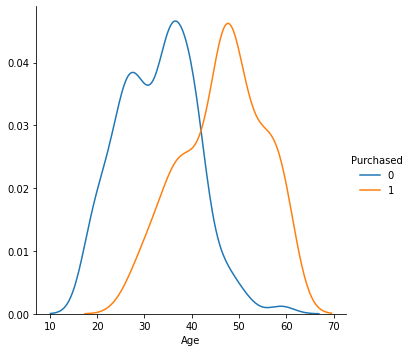

In [7]:
import seaborn as sns
sns.FacetGrid (df1, hue = 'Purchased', height=5).map(sns.kdeplot, 'Age').add_legend()

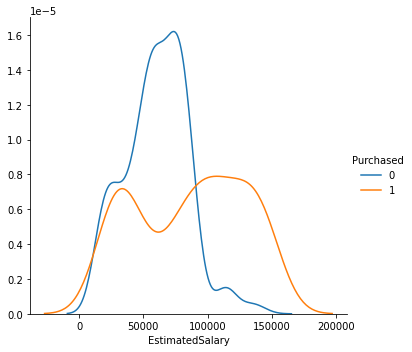

In [8]:
import seaborn as sns
sns.FacetGrid (df1, hue = 'Purchased', height=5).map(sns.kdeplot, 'EstimatedSalary').add_legend()

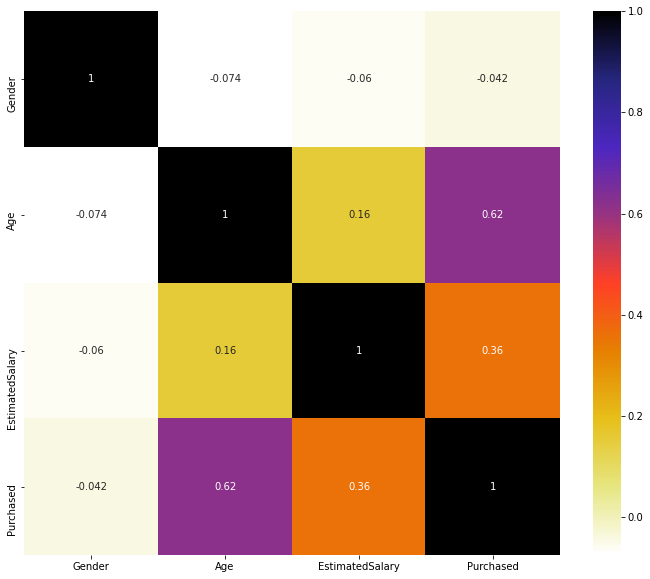

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))

corr = df1.corr()
sns.heatmap(corr, annot=True, cmap = plt.cm.CMRmap_r)
plt.show()

In [10]:
features_col =['Gender',	'Age',	'EstimatedSalary']
X = df1[features_col]
y= df1['Purchased']

In [11]:
X.head()


,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [12]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=.10)
X_train

,Gender,Age,EstimatedSalary
46,1,25,79000
220,0,41,80000
341,1,35,75000
229,0,42,80000
314,0,39,79000
...,...,...,...
34,1,27,90000
238,0,46,82000
272,1,60,42000
370,0,60,46000


In [14]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 338 to 66
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           40 non-null     int64
 1   Age              40 non-null     int64
 2   EstimatedSalary  40 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


In [15]:
from sklearn import preprocessing

X_train_new = preprocessing.scale(X_train)
X_test_new = preprocessing.scale(X_test)


In [16]:
from sklearn.svm import SVC

svm = SVC(kernel='linear') #kernel(linear,poly,rbf,sigmoid,precomputed)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [17]:
from sklearn import metrics
print('accuracy:',metrics.accuracy_score(y_test,y_pred))

accuracy: 0.775


In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        28
           1       0.60      0.75      0.67        12

    accuracy                           0.78        40
   macro avg       0.74      0.77      0.75        40
weighted avg       0.80      0.78      0.78        40



In [19]:
from sklearn import tree

tree = tree.DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
y_pred

metrics.accuracy_score(y_test,y_pred)


0.85

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        28
           1       0.75      0.75      0.75        12

    accuracy                           0.85        40
   macro avg       0.82      0.82      0.82        40
weighted avg       0.85      0.85      0.85        40



In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred 

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [22]:
metrics.accuracy_score(y_test, y_pred)

0.9

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        28
           1       0.83      0.83      0.83        12

    accuracy                           0.90        40
   macro avg       0.88      0.88      0.88        40
weighted avg       0.90      0.90      0.90        40



In [24]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [25]:
metrics.accuracy_score(y_test, y_pred)

0.975

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.92      0.96        12

    accuracy                           0.97        40
   macro avg       0.98      0.96      0.97        40
weighted avg       0.98      0.97      0.97        40



In [27]:
from sklearn import model_selection

kfold = model_selection.KFold(n_splits = 5, random_state = 30)
model = SVC(kernel='linear')
results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold)
results

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


array([0.80555556, 0.81944444, 0.86111111, 0.84722222, 0.75      ])